# One-Vs-Rest for Multi-Class Classification

One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class.

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes.

In [42]:
import numpy as np
import pandas as pd

In [44]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model,n_jobs=-1)
# fit model
ovr.fit(X, y)
# make predictions
y_pred = ovr.predict(X)
y_prob = ovr.predict_proba(X)[:,1]
y_df = ovr.decision_function(X)

comfusion matrix = 
[[259  60  13]
 [ 50 222  62]
 [ 80  39 215]]

classification_report
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       332
           1       0.69      0.66      0.68       334
           2       0.74      0.64      0.69       334

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000


accuracy_score =  0.696
balanced_accuracy_score =  0.6962

precision score =  0.6997
recall score =  0.696

fp= [130.  99.  75.]
fn= [ 73. 112. 119.]
tp= [259. 222. 215.]
tn= [538. 567. 591.]

F1 score =  0.6951
F2 score =  [0.6859 0.686  0.7195]
avg F2 score =  0.6972
F3 score =  [0.6757 0.6888 0.7303]
avg F3 score =  0.6983
F_beta score =  0.6972
Matthews Correlation Coefficient score =  0.5463

precision =  [0.6658 0.6916 0.7414]
avg precision =  0.6996
recall =  [0.7801 0.6647 0.6437]
avg recall =  0.6962
AUC of ROC for

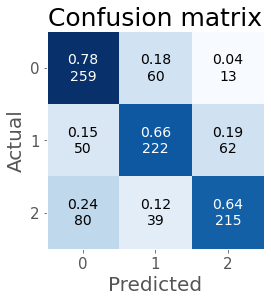

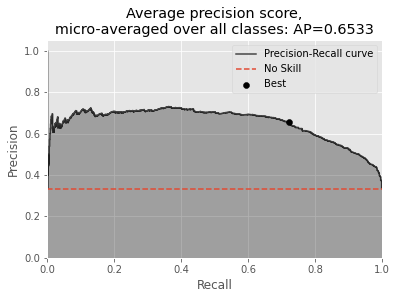

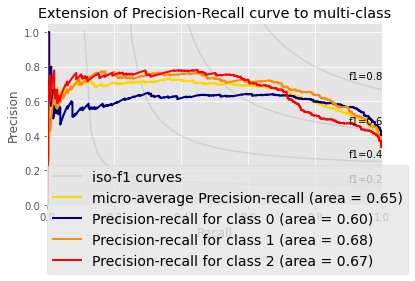

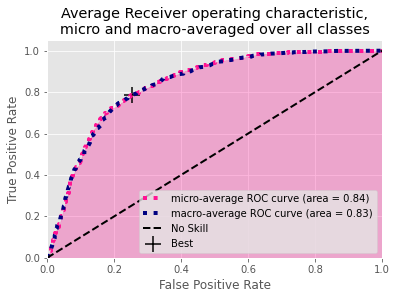

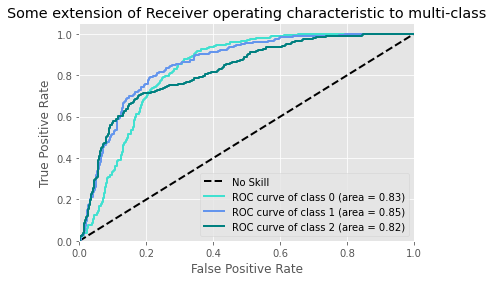


time span=  1


In [77]:
scoring.print_score_multiclass(y,y_pred,y_prob,y_df,mc='ovr',labels=[0,1,2])

# One-Vs-One for Multi-Class Classification

One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification.

Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class

The formula for calculating the number of binary datasets, and in turn, models, is as follows:

   (NumClasses * (NumClasses – 1)) / 2


Each binary classification model may predict one class label and the model with the most predictions or votes is predicted by the one-vs-one strategy.

In [74]:
# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model,n_jobs=-1)
# fit model
ovo.fit(X, y)
# make predictions
y_pred = ovr.predict(X)
y_prob = ovr.predict_proba(X)[:,1]
y_df = ovr.decision_function(X)

comfusion matrix = 
[[259  60  13]
 [ 50 222  62]
 [ 80  39 215]]

classification_report
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       332
           1       0.69      0.66      0.68       334
           2       0.74      0.64      0.69       334

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000


accuracy_score =  0.696
balanced_accuracy_score =  0.6962

precision score =  0.6997
recall score =  0.696

fp= [130.  99.  75.]
fn= [ 73. 112. 119.]
tp= [259. 222. 215.]
tn= [538. 567. 591.]

F1 score =  0.6951
F2 score =  [0.6859 0.686  0.7195]
avg F2 score =  0.6972
F3 score =  [0.6757 0.6888 0.7303]
avg F3 score =  0.6983
F_beta score =  0.6972
Matthews Correlation Coefficient score =  0.5463

precision =  [0.6658 0.6916 0.7414]
avg precision =  0.6996
recall =  [0.7801 0.6647 0.6437]
avg recall =  0.6962
AUC of ROC for

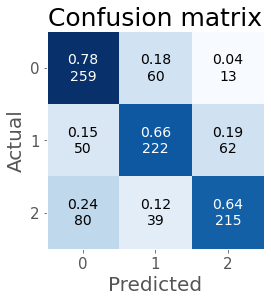

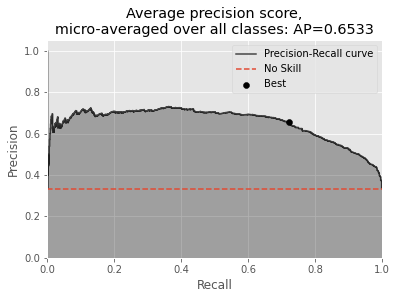

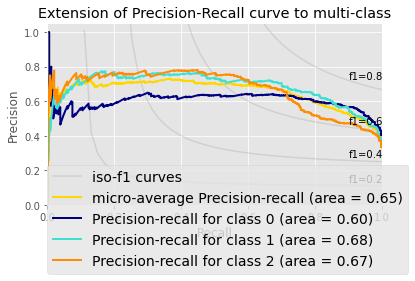

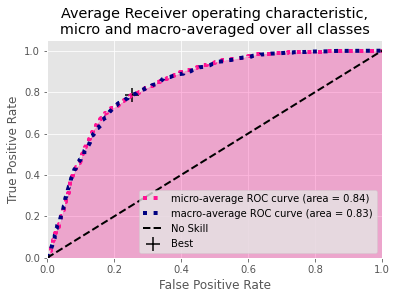

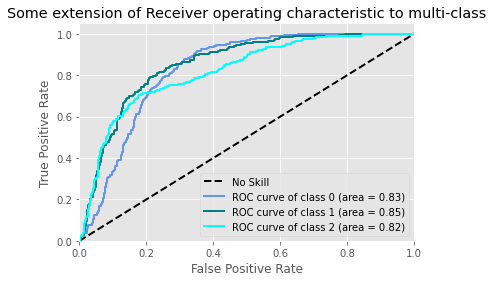


time span=  1


In [75]:
scoring.print_score_multiclass(y,y_pred,y_prob,y_df,mc='ovo',labels=[0,1,2])